In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\\Family Income and Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

<h1 style="font-size:50px">1. Which regions have the highest and lowest average household income?</h1>

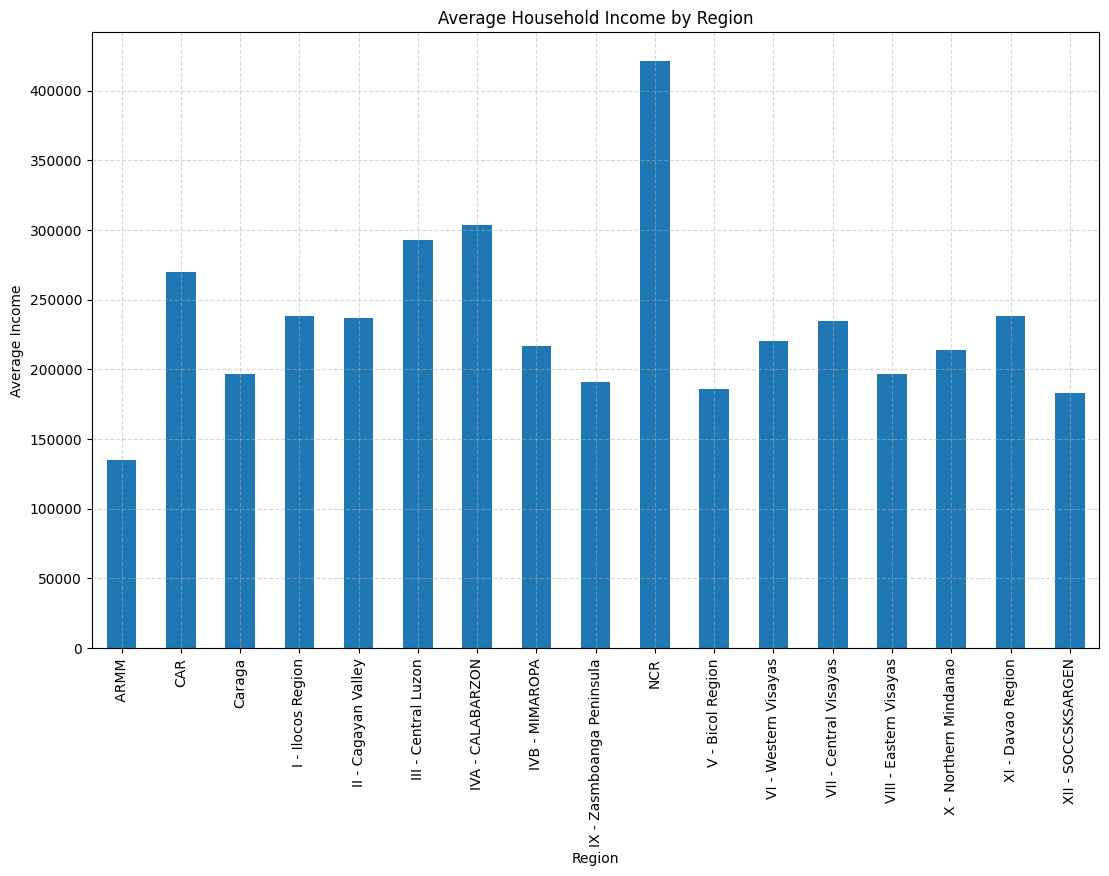

In [4]:
regionincome = df.groupby('Region')['Total Household Income'].mean()
regionincome.plot(kind='bar', title='Average Household Income by Region')
plt.ylabel('Average Income')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #1: Households in NCR earn the most money on average, while households in ARMM earn the least.</h1>

<h1 style="font-size:50px">2. What is the average income by household head’s sex?</h1>

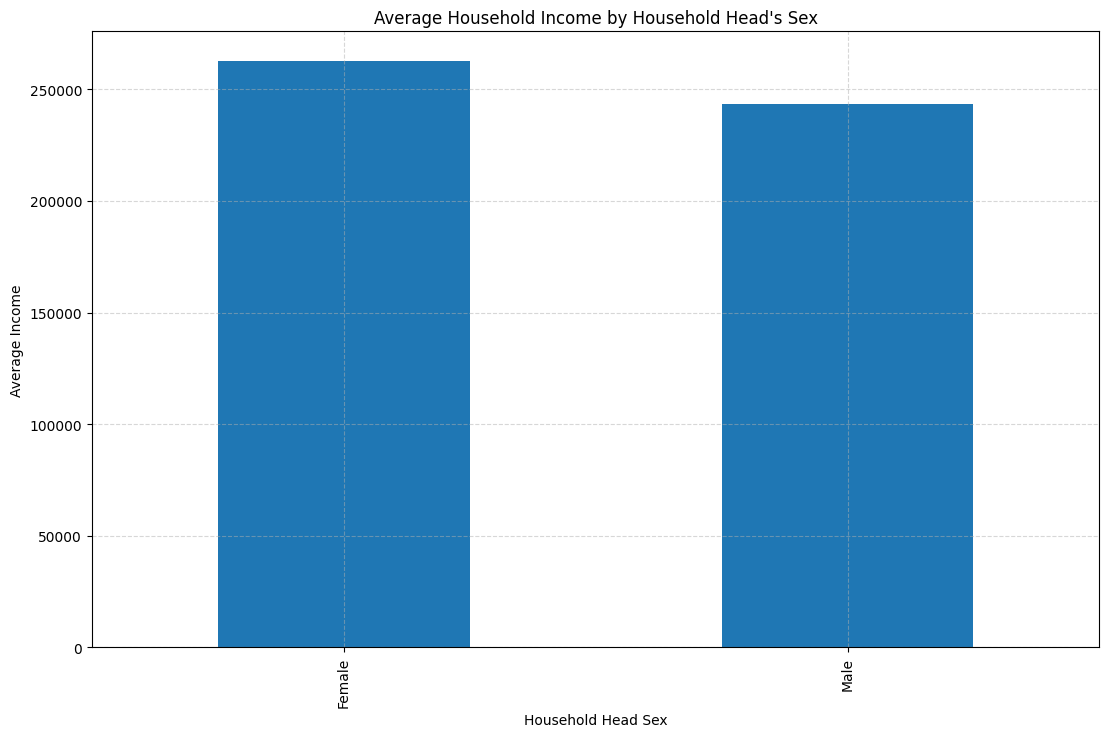

In [5]:
sexincome = df.groupby('Household Head Sex')['Total Household Income'].mean()
sexincome.plot(kind='bar', title='Average Household Income by Household Head\'s Sex')
plt.ylabel('Average Income')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

In [6]:
sexincome

Household Head Sex
Female    262804.552257
Male      243301.947696
Name: Total Household Income, dtype: float64

<h1>Insight #2: Households with Female has higher average income with 262,804, while males have 243,301.</h1>

<h1 style="font-size:50px">3. How does income vary with the household head’s age?</h1>

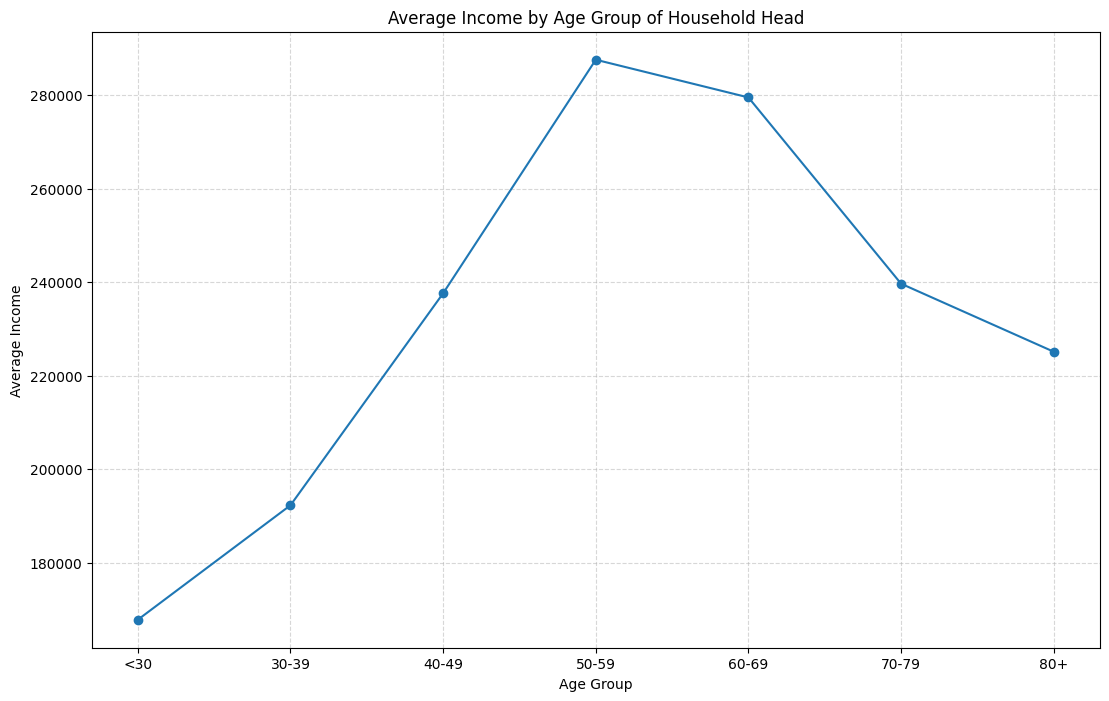

In [7]:
bins = [0, 29, 39, 49, 59, 69, 79, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age Group'] = pd.cut(df['Household Head Age'], bins=bins, labels=labels, right=False)

ageincome = df.groupby('Age Group')['Total Household Income'].mean()
ageincome.plot(kind='line', marker='o', title='Average Income by Age Group of Household Head')
plt.ylabel('Average Income')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #3: Income goes up as the household head gets older, and it’s highest for those aged 50–59. After that, income starts to go down again.</h1>

<h1 style="font-size:50px">4. Do educational levels of the household head affect income?</h1>

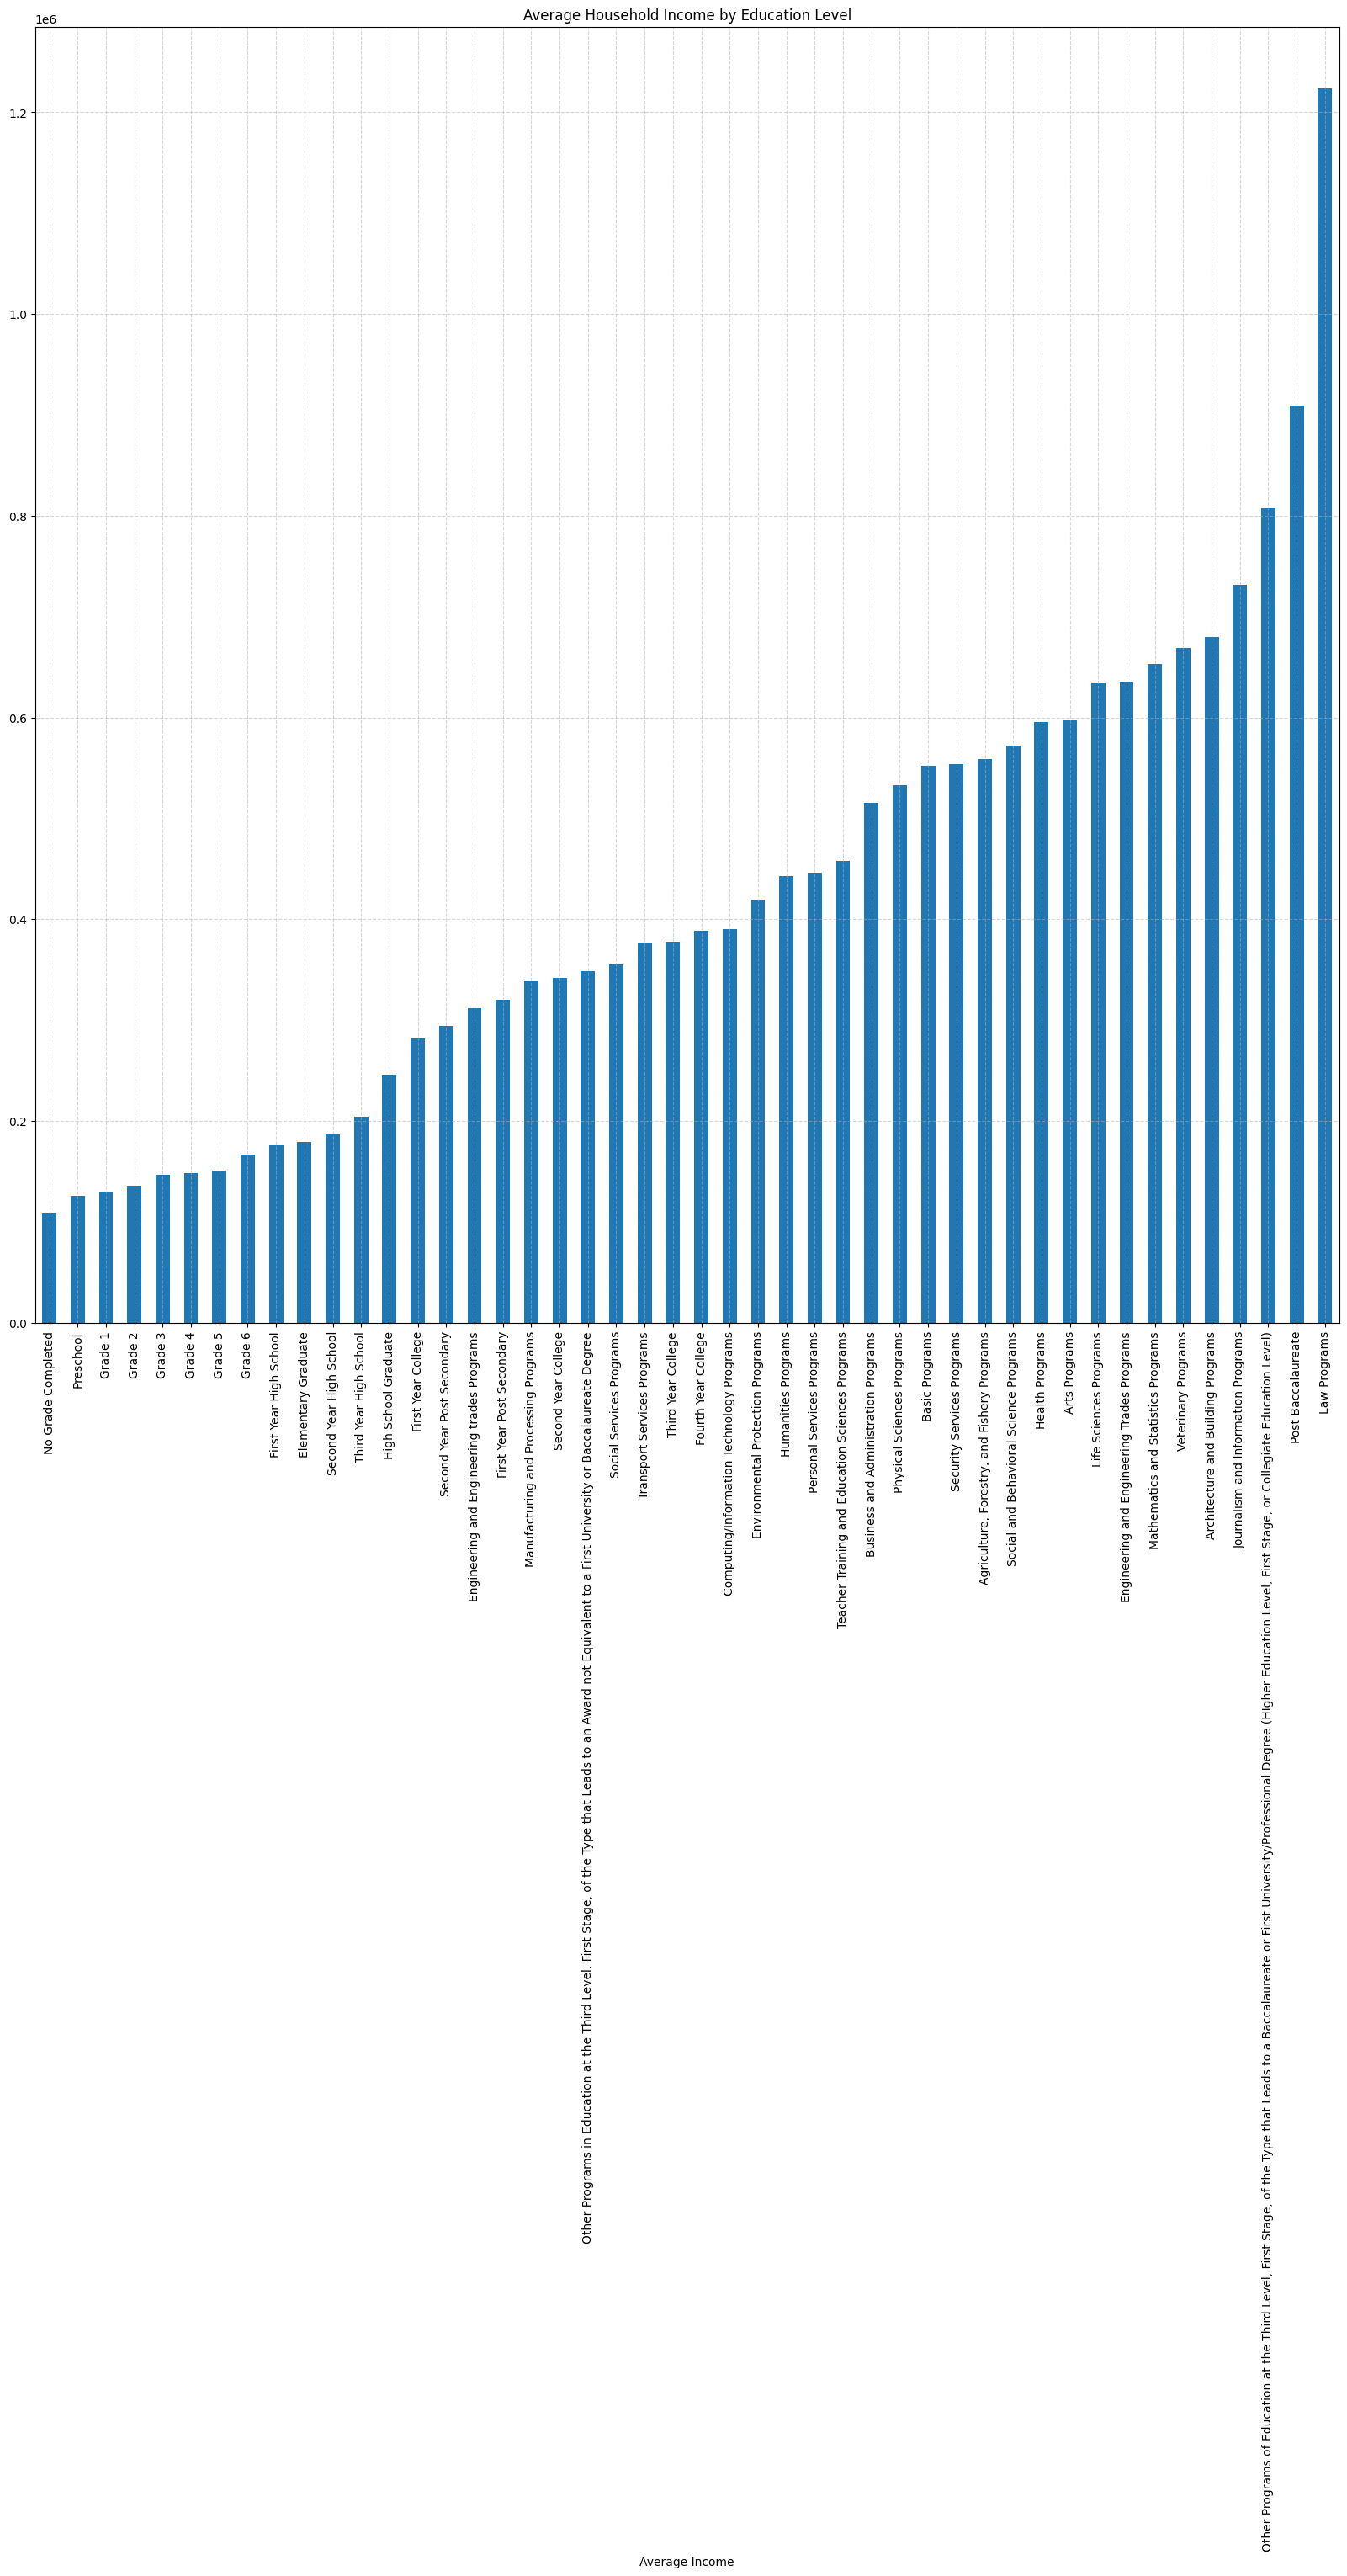

In [8]:
eduincome = df.groupby('Household Head Highest Grade Completed')['Total Household Income'].mean().sort_values()
eduincome.plot(kind='bar', title='Average Household Income by Education Level')
plt.xlabel('Average Income')
plt.gcf().set_size_inches(20,20)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #4: People with higher education levels usually have higher incomes.</h1>

<h1 style="font-size:50px">5. What region has the highest total number of family members?</h1>

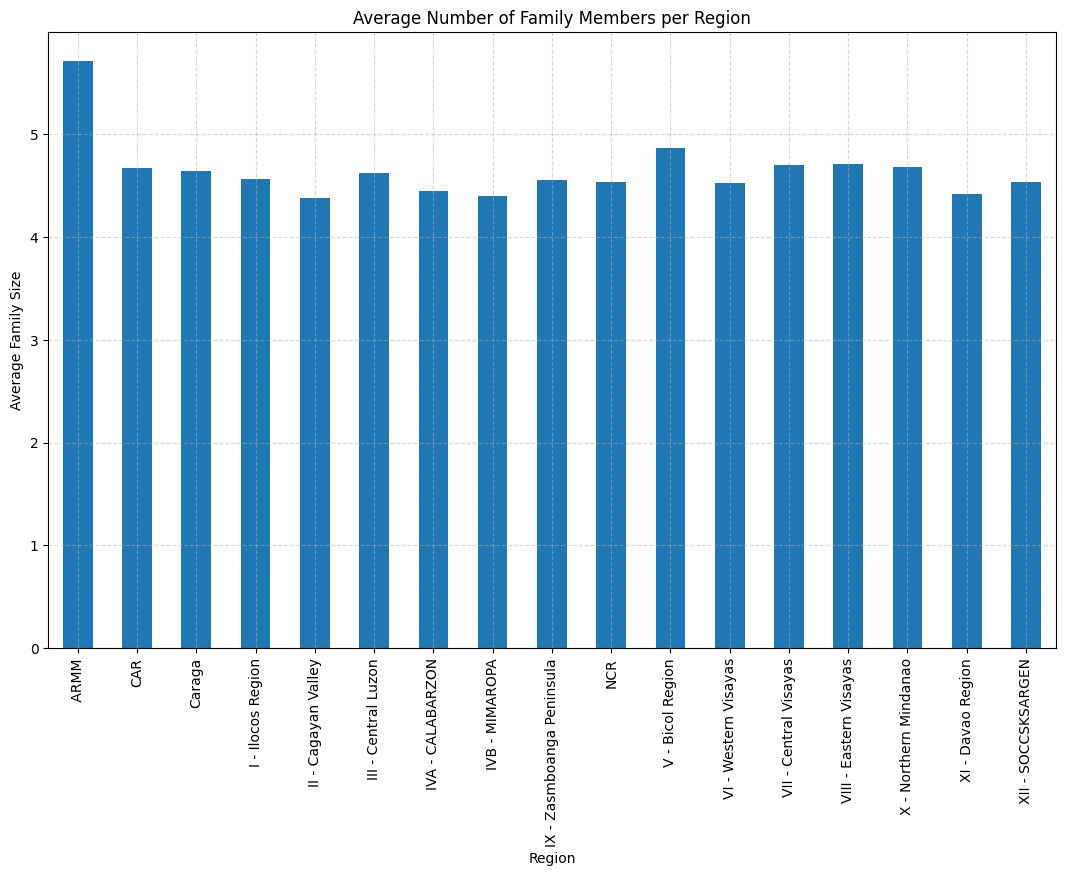

In [9]:
regionfamsize = df.groupby('Region')['Total Number of Family members'].mean()
regionfamsize.plot(kind='bar', title='Average Number of Family Members per Region')
plt.ylabel('Average Family Size')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #5: ARMM region has the highest family members with the average of more more than 5.</h1>

<h1 style="font-size:50px">6. What is the average number of employed members per household per region?</h1>

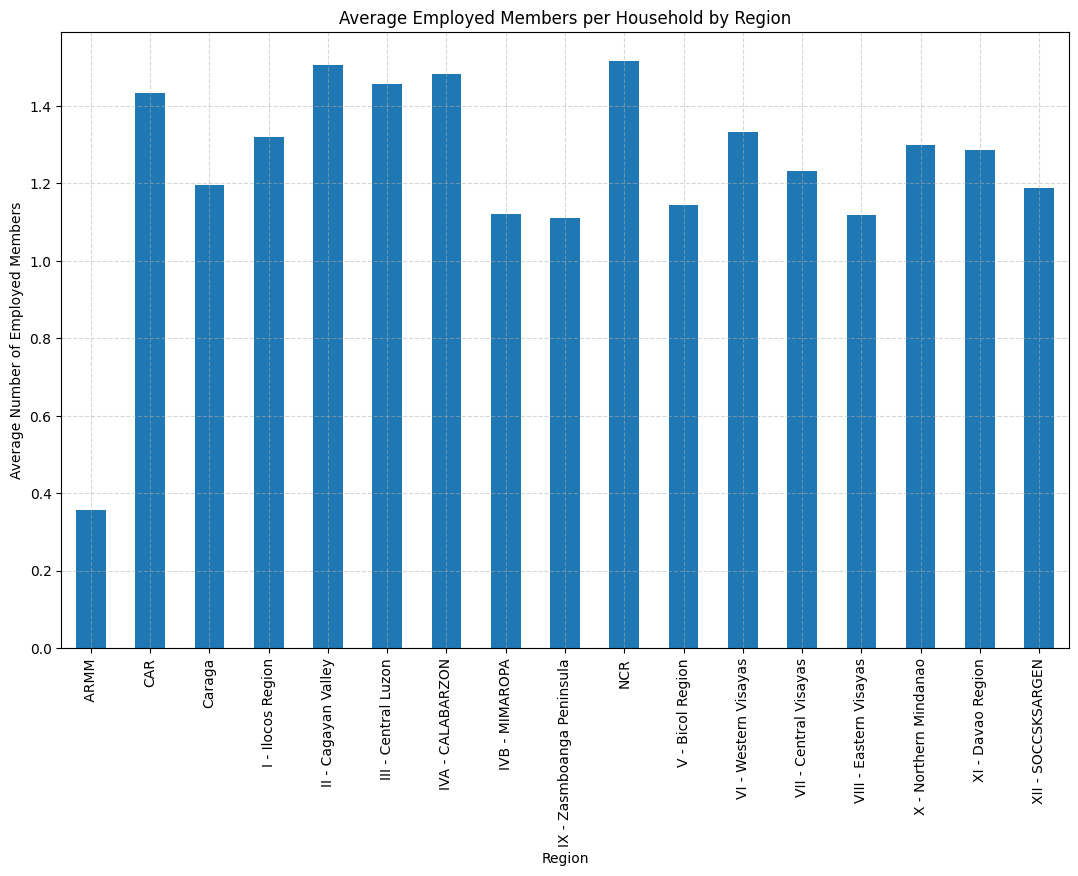

In [10]:
regionemployed = df.groupby('Region')['Total number of family members employed'].mean()
regionemployed.plot(kind='bar', title='Average Employed Members per Household by Region')
plt.ylabel('Average Number of Employed Members')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #6: Though ARMM region has the highest family members, NCR region has the highest number of employed family member.</h1>

<h1 style="font-size:50px">7. What types of houses are most common across regions?</h1>

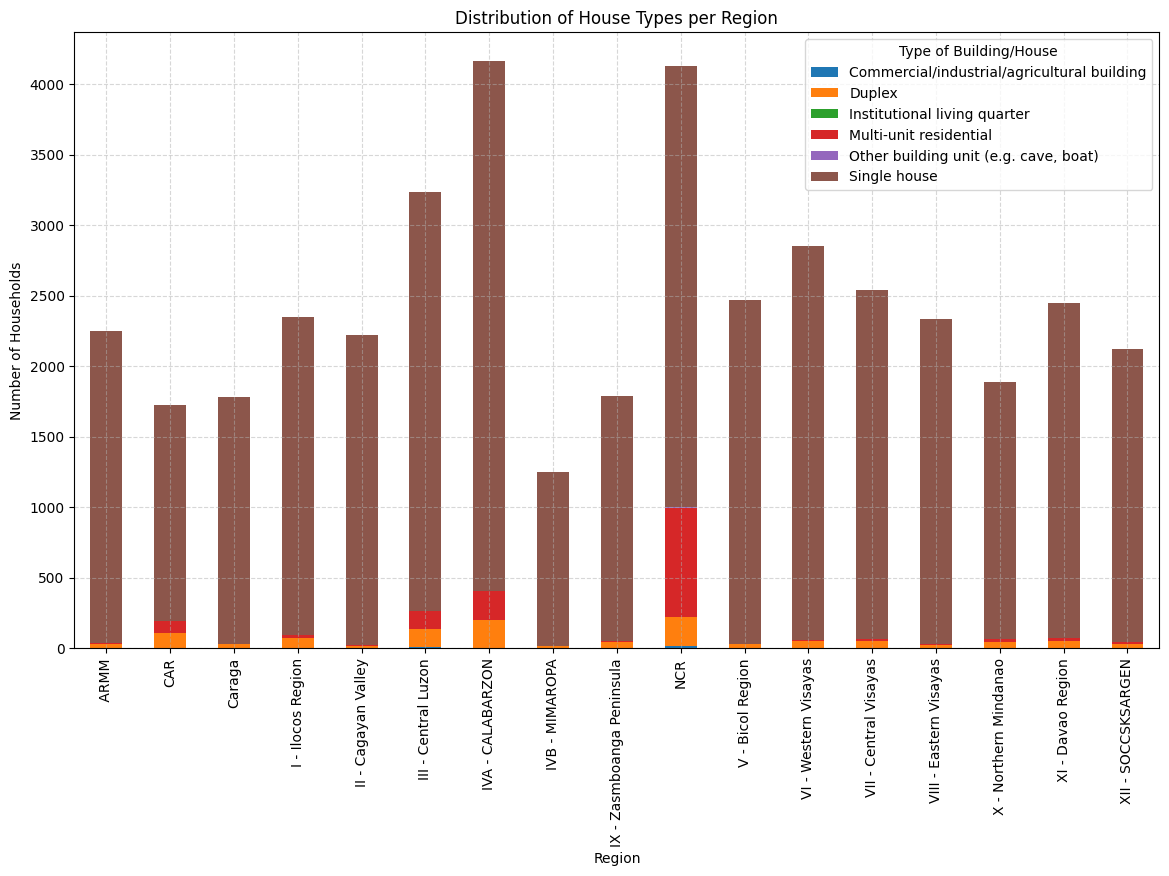

In [11]:
housetyperegion = df.groupby(['Region', 'Type of Building/House']).size().unstack()
housetyperegion.plot(kind='bar', stacked=True, title='Distribution of House Types per Region')
plt.ylabel('Number of Households')
plt.gcf().set_size_inches(14,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #7: Most common type of house in each region is single house.</h1>

<h1 style="font-size:50px">8. What is the relationship between house floor area and household income?</h1>

In [12]:
IVA = df[df['Region']== "IVA - CALABARZON"]
EnterpreneurialActivities4a = IVA[IVA['Main Source of Income']== "Enterpreneurial Activities"]
EnterpreneurialActivities4a

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Age Group
2529,81420,IVA - CALABARZON,73498,Enterpreneurial Activities,1,27924,25584,7893,10612,1200,...,1,0,0,0,2,0,0,0,1,50-59
2544,126013,IVA - CALABARZON,71120,Enterpreneurial Activities,0,21538,16900,8239,13304,2330,...,0,0,0,0,2,0,0,0,0,60-69
2571,232279,IVA - CALABARZON,100313,Enterpreneurial Activities,0,26459,21225,15282,14136,2700,...,1,1,0,0,2,1,0,0,0,70-79
2573,277688,IVA - CALABARZON,120316,Enterpreneurial Activities,0,32814,22444,20774,8868,2235,...,0,0,0,0,4,0,0,0,0,40-49
2587,122336,IVA - CALABARZON,66365,Enterpreneurial Activities,0,23492,14850,15376,11404,959,...,0,0,0,0,2,0,0,0,1,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30609,372015,IVA - CALABARZON,138318,Enterpreneurial Activities,0,32913,24880,23308,15403,11160,...,1,0,0,0,1,0,0,0,0,50-59
30610,222886,IVA - CALABARZON,178189,Enterpreneurial Activities,0,59589,47965,27554,24856,3250,...,1,0,0,0,1,0,0,0,0,30-39
30611,193065,IVA - CALABARZON,115533,Enterpreneurial Activities,0,22298,16290,25389,6870,2375,...,0,0,0,0,2,0,0,0,0,<30
30619,408727,IVA - CALABARZON,124959,Enterpreneurial Activities,0,41015,33726,17440,17908,1598,...,1,0,0,0,4,0,0,0,1,40-49


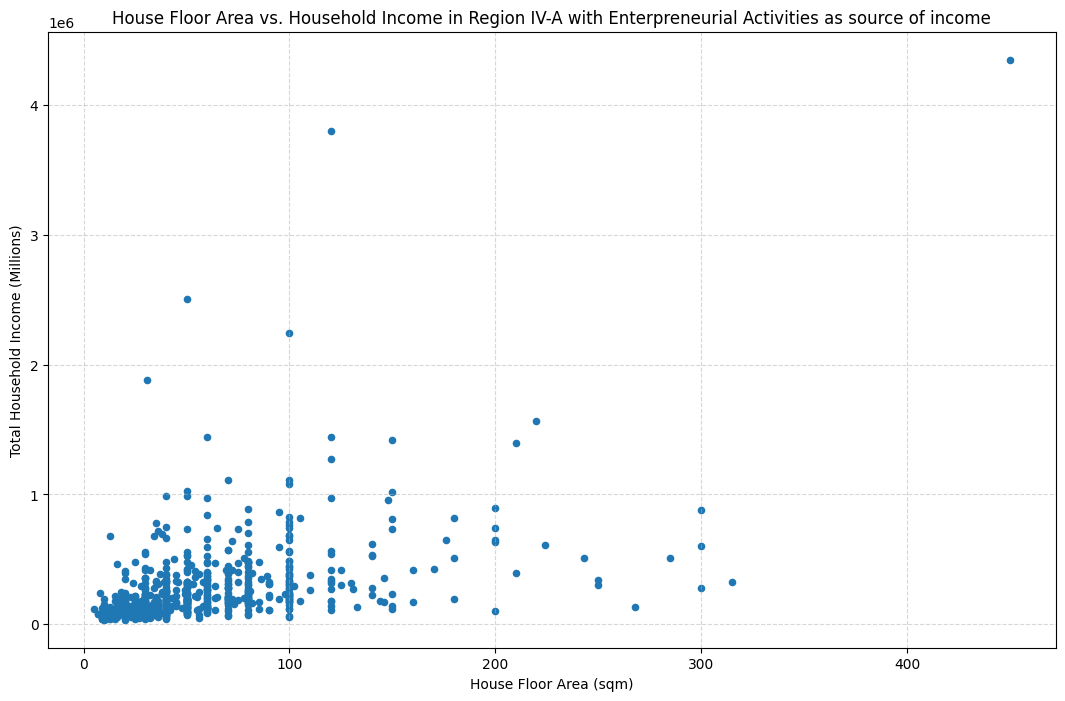

In [13]:
EnterpreneurialActivities4a.plot(kind='scatter', x='House Floor Area', y='Total Household Income', title='House Floor Area vs. Household Income in Region IV-A with Enterpreneurial Activities as source of income')
plt.xlabel('House Floor Area (sqm)')
plt.ylabel('Total Household Income (Millions)')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #8: The bigger the house floor area the higher household income.</h1>

<h1 style="font-size:50px">9. What percentage of households in Region IV-A are Married?</h1>

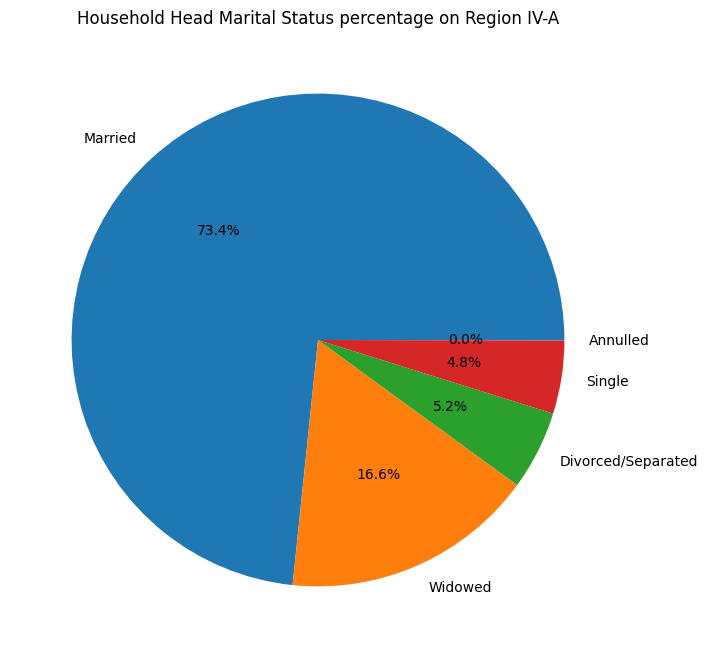

In [14]:
maritalstatus4a = IVA['Household Head Marital Status'].value_counts(normalize=True) * 100
maritalstatus4a.plot(kind='pie', autopct='%1.1f%%', title='Household Head Marital Status percentage on Region IV-A')
plt.ylabel('')
plt.gcf().set_size_inches(8,8)
plt.show()

<h1>Insight #9: 73.4% are married in region IV-A.</h1>

<h1 style="font-size:50px">10. Which region has the highest households that use a dug well as a source of water supply?</h1>

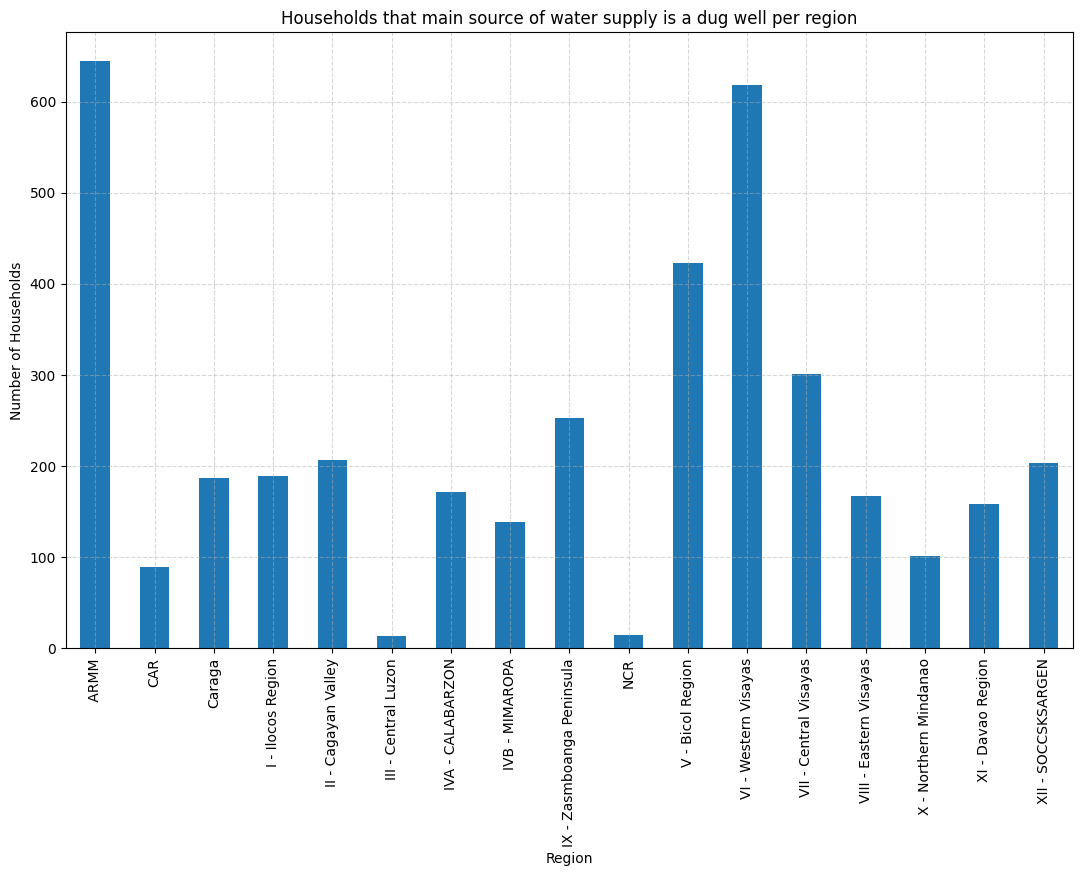

In [15]:
dugwell = df[df['Main Source of Water Supply'] == 'Dug well']
x = dugwell['Region'].value_counts().sort_index().reset_index()
x.plot(kind="bar", legend=False, x='Region', title="Households that main source of water supply is a dug well per region")
plt.ylabel('Number of Households')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

In [16]:
arm = df[df['Region'] ==" ARMM"]
arm['Main Source of Water Supply'].value_counts()

Main Source of Water Supply
Dug well                                   644
Lake, river, rain and others               297
Shared, tubed/piped deep well              291
Own use, tubed/piped deep well             246
Shared, faucet, community water system     184
Protected spring, river, stream, etc       183
Own use, faucet, community water system    144
Peddler                                    122
Unprotected spring, river, stream, etc      84
Tubed/piped shallow well                    42
Others                                      11
Name: count, dtype: int64

<h1>Insight #10: In ARMM region, their main source of water supply is dug well.</h1>

<h1 style="font-size:50px">11. What are the top five most owned appliances/devices in households?</h1>

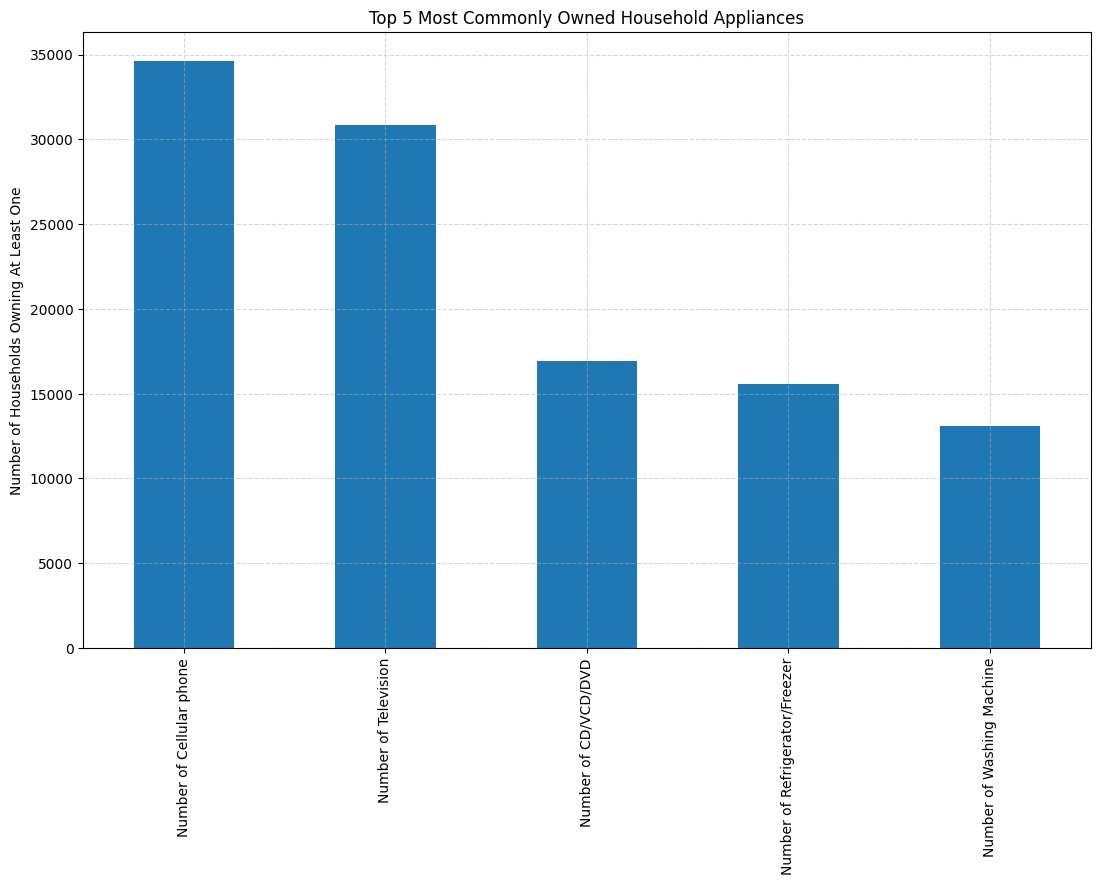

In [17]:
appliancecolumns = [
    'Number of Television',
    'Number of CD/VCD/DVD',
    'Number of Component/Stereo set',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Landline/wireless telephones',
    'Number of Cellular phone',
    'Number of Personal Computer',
    'Number of Stove with Oven/Gas Range',
    'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle'
]
appliancecounts = (df[appliancecolumns] > 0).sum().sort_values(ascending=False).head(5)
appliancecounts.plot(kind='bar', title='Top 5 Most Commonly Owned Household Appliances')
plt.ylabel('Number of Households Owning At Least One')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #11: The top 5 most commonly owned household appliances are Cellphone, Television, CD/VCD/DVD, Refrigerator/Freezer, and washing machine.</h1>

<h1 style="font-size:50px">12. Which region spends the most on alcohol?</h1>

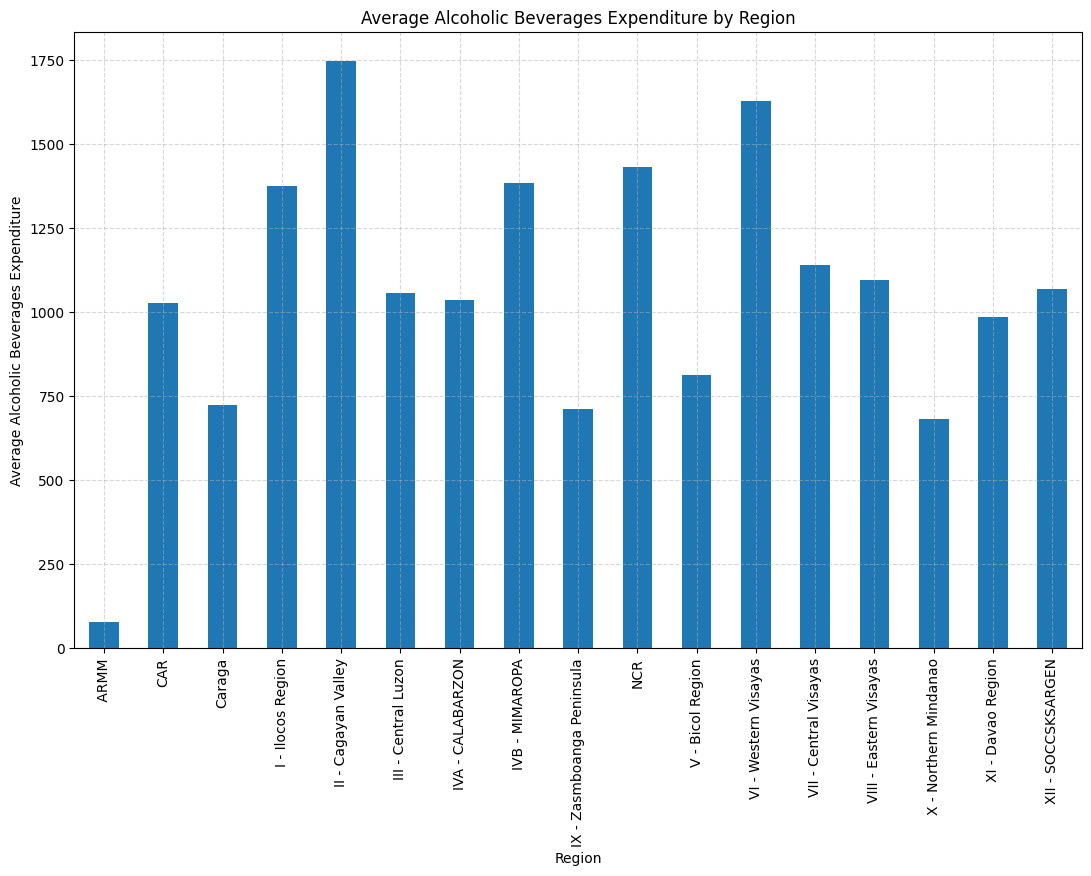

In [18]:
regionalcohol = df.groupby('Region')['Alcoholic Beverages Expenditure'].mean()
regionalcohol.plot(kind='bar', title='Average Alcoholic Beverages Expenditure by Region')
plt.ylabel('Average Alcoholic Beverages Expenditure')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #12: Region II - Cagayan Valley region spends the most on alcoholic beverages.</h1>

<h1 style="font-size:50px">13. What region has the highest average Entrpreneurial income?</h1>

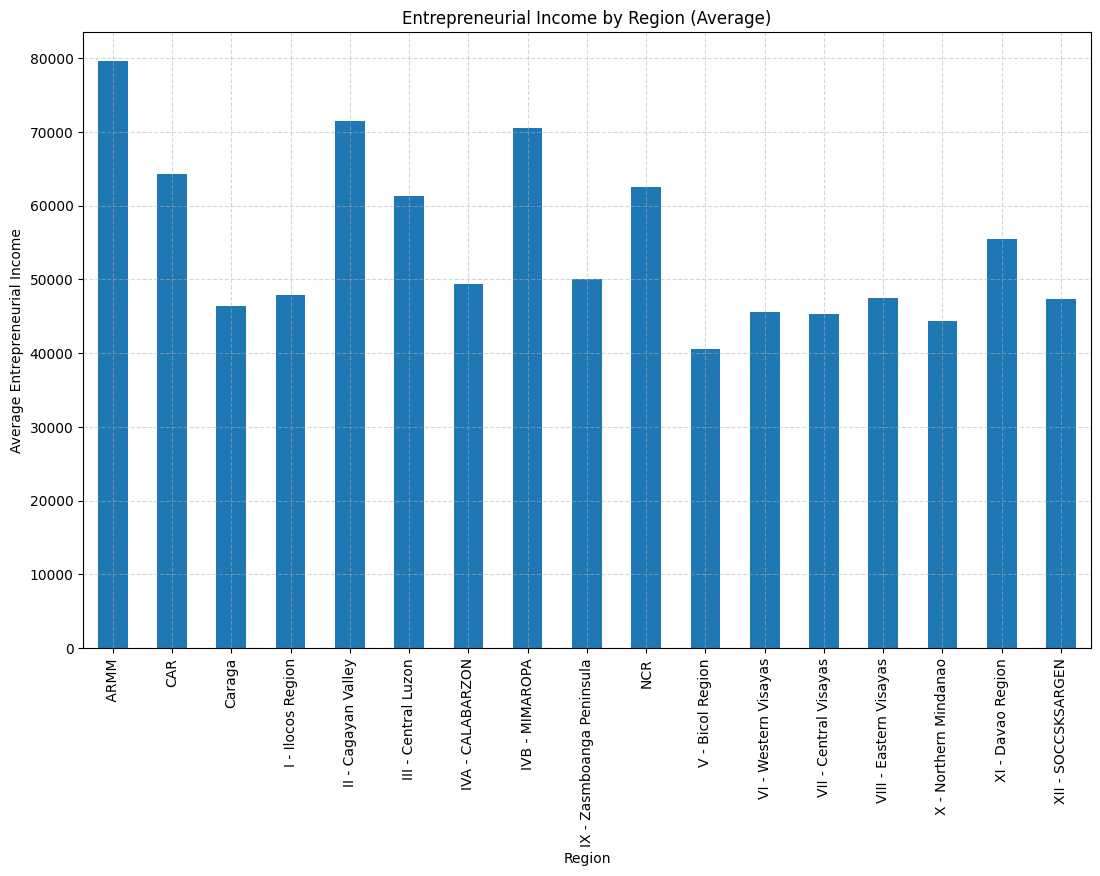

In [19]:
entrepreneurregion = df.groupby('Region')['Total Income from Entrepreneurial Acitivites'].mean()
entrepreneurregion.plot(kind='bar', title='Entrepreneurial Income by Region (Average)')
plt.ylabel('Average Entrepreneurial Income')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #13: In ARMM region, they have the highest average entrepreneurial income.</h1>

<h1 style="font-size:50px">14. Which food category gets the highest expenditure across all households?</h1>

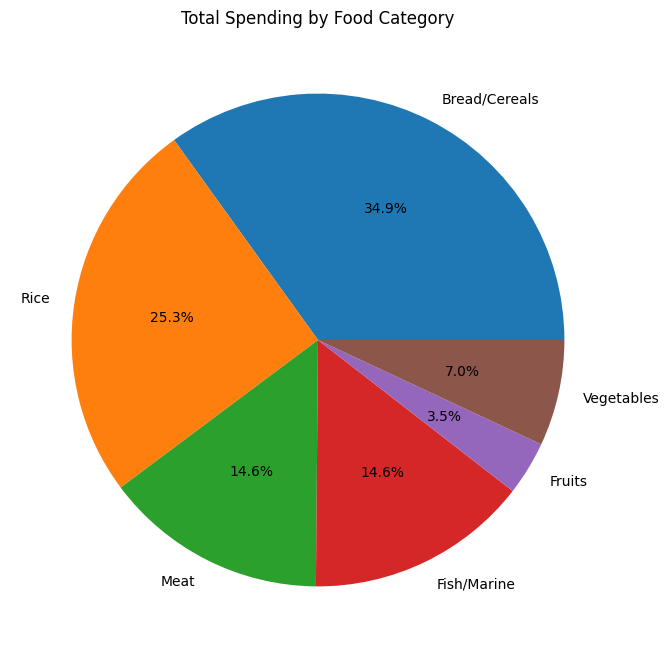

In [20]:
foodcategories = {
    'Bread and Cereals Expenditure': 'Bread/Cereals',
    'Total Rice Expenditure': 'Rice',
    'Meat Expenditure': 'Meat',
    'Total Fish and  marine products Expenditure': 'Fish/Marine',
    'Fruit Expenditure': 'Fruits',
    'Vegetables Expenditure': 'Vegetables'
}

categorytotals = df[list(foodcategories.keys())].sum().rename(index=foodcategories)
categorytotals.plot(kind='pie', autopct='%1.1f%%', title='Total Spending by Food Category')
plt.ylabel('')
plt.gcf().set_size_inches(8,8)
plt.show()

<h1>Insight #14: Bread/cereals has the highest expedinture with total of 34.9% across all households.</h1>

<h1 style="font-size:50px">15. Which non-food category has the highest expenditure overall??</h1>

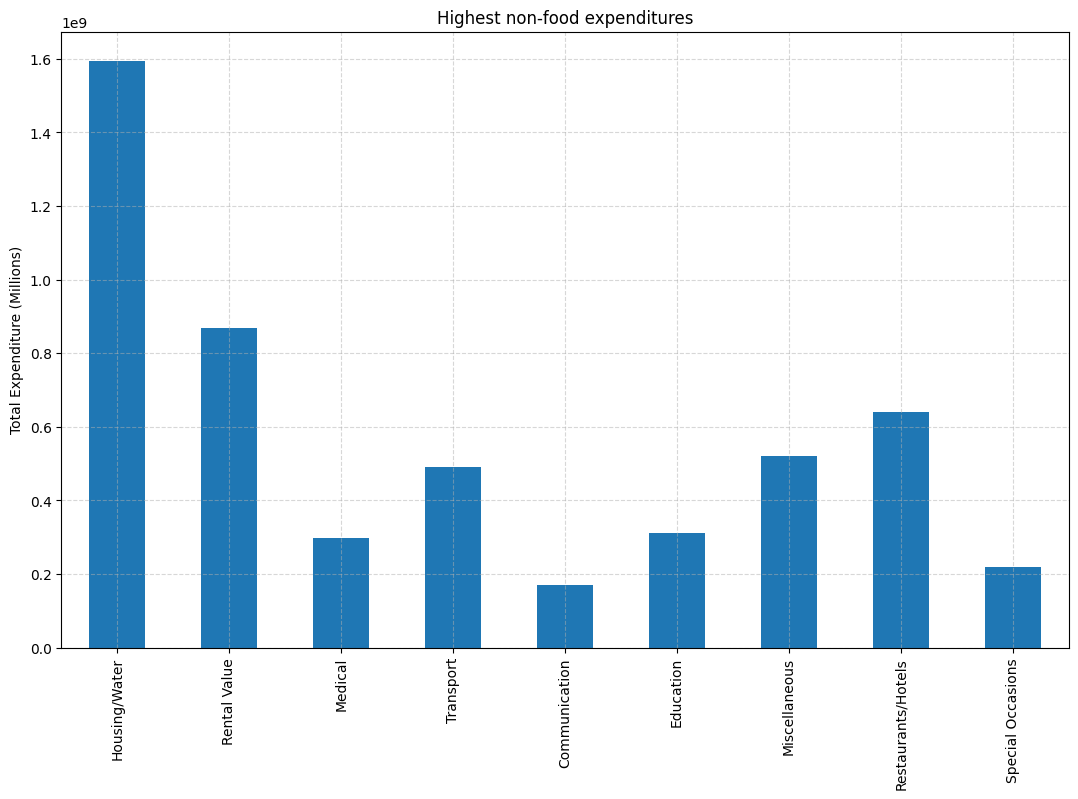

In [21]:
nonfoodcolumns = {
    'Housing and water Expenditure': 'Housing/Water',
    'Imputed House Rental Value': 'Rental Value',
    'Medical Care Expenditure': 'Medical',
    'Transportation Expenditure': 'Transport',
    'Communication Expenditure': 'Communication',
    'Education Expenditure': 'Education',
    'Miscellaneous Goods and Services Expenditure': 'Miscellaneous',
    'Restaurant and hotels Expenditure': 'Restaurants/Hotels',
    'Special Occasions Expenditure': 'Special Occasions'
}
nonfoodsum = df[list(nonfoodcolumns.keys())].sum().rename(index=nonfoodcolumns)
nonfoodsum.plot(kind='bar', title='Highest non-food expenditures')
plt.ylabel('Total Expenditure (Millions)')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #15: Highest non-food expedinture is housing/water.</h1>

<h1 style="font-size:50px">16. Which region spends the most on education?</h1>

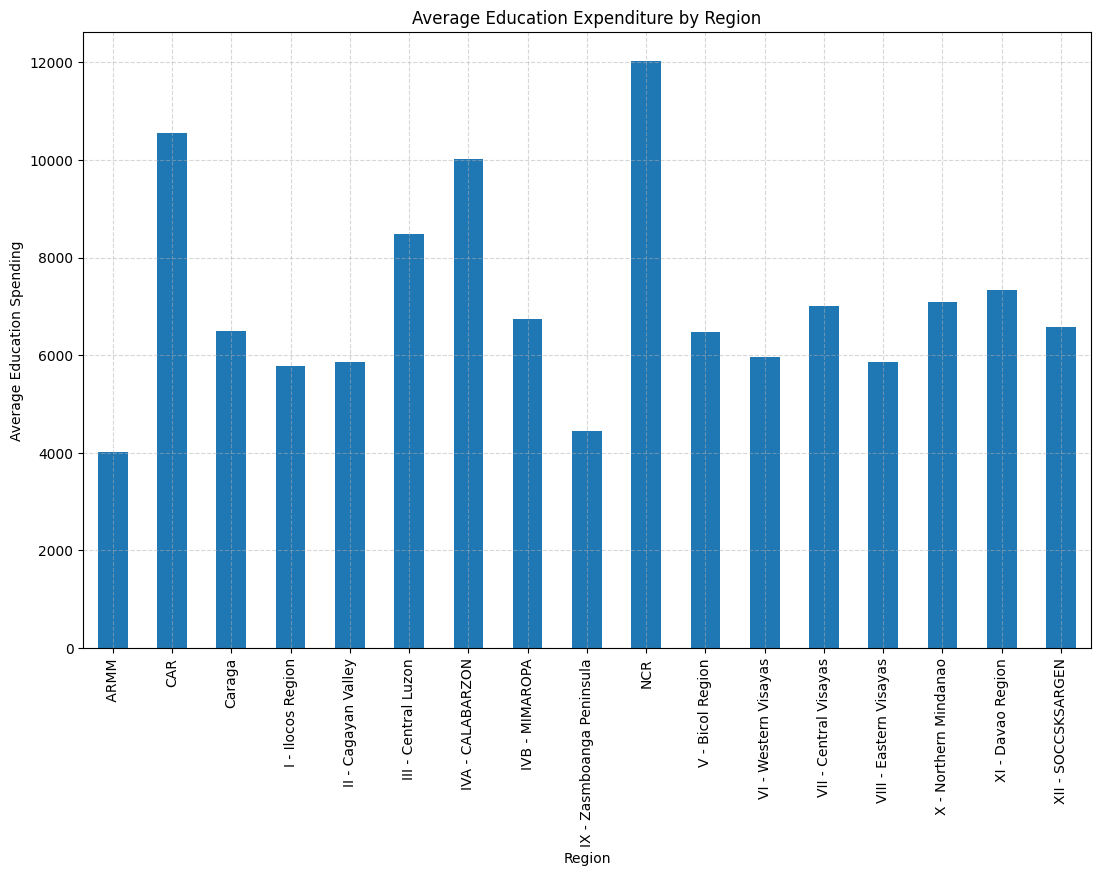

In [22]:
eduregion = df.groupby('Region')['Education Expenditure'].mean()
eduregion.plot(kind='bar', title='Average Education Expenditure by Region')
plt.ylabel('Average Education Spending')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #16: NCR region has the highest average spend on education.</h1>

<h1 style="font-size:50px">17. Do households with children (age 5–17) spend more on education?</h1>

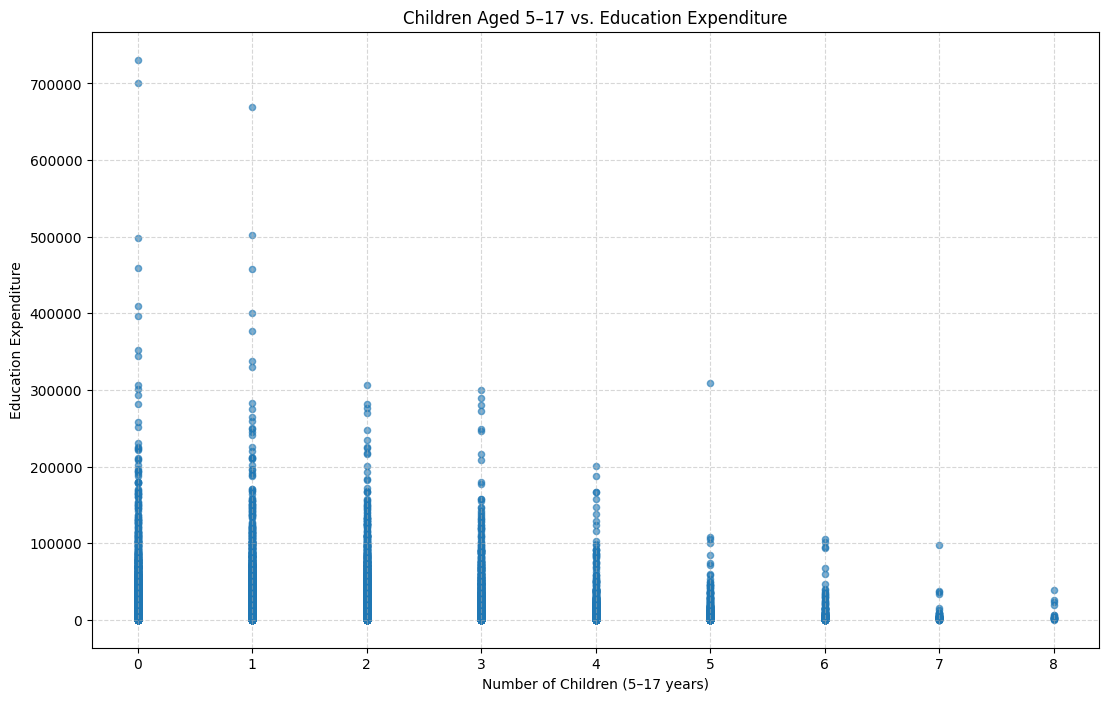

In [23]:
df.plot(kind='scatter',
        x='Members with age 5 - 17 years old',
        y='Education Expenditure',
        title='Children Aged 5–17 vs. Education Expenditure',
        alpha=0.6)

plt.xlabel('Number of Children (5–17 years)')
plt.ylabel('Education Expenditure')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #17: 0 number of children (5-17) has the highest expenditure on education. I think this means that above 17 years old are spends on education, like for college students.</h1>

<h1 style="font-size:50px">18. Which class of worker earns the most on average?</h1>

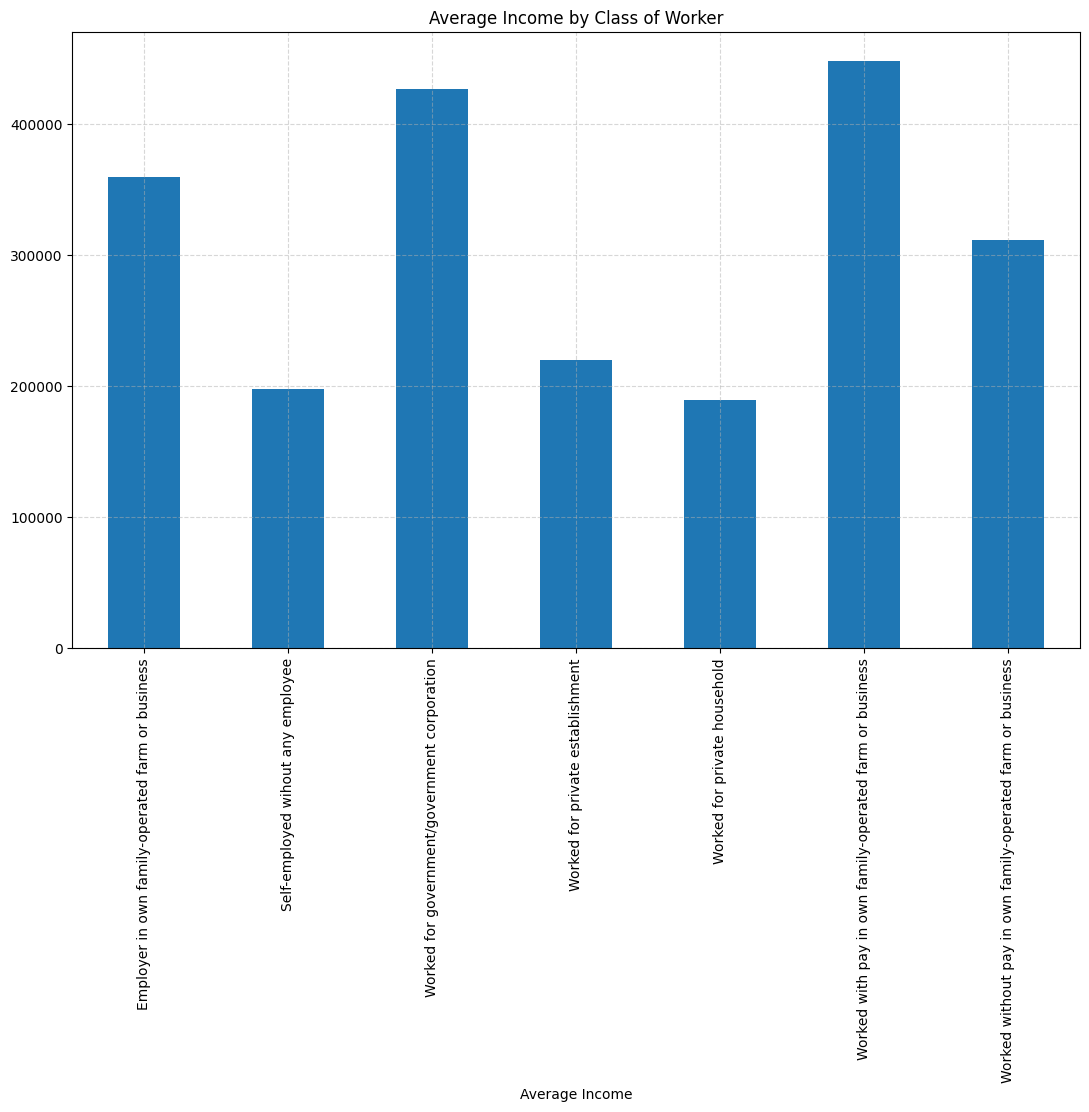

In [24]:
classincome = df.groupby('Household Head Class of Worker')['Total Household Income'].mean()
classincome.plot(kind='bar', title='Average Income by Class of Worker')
plt.xlabel('Average Income')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #18: Worked with pay in own family-operated farm or business has the highest average income.</h1>

<h1 style="font-size:50px">19. How do restaurant/hotel expenses vary across household types?</h1>

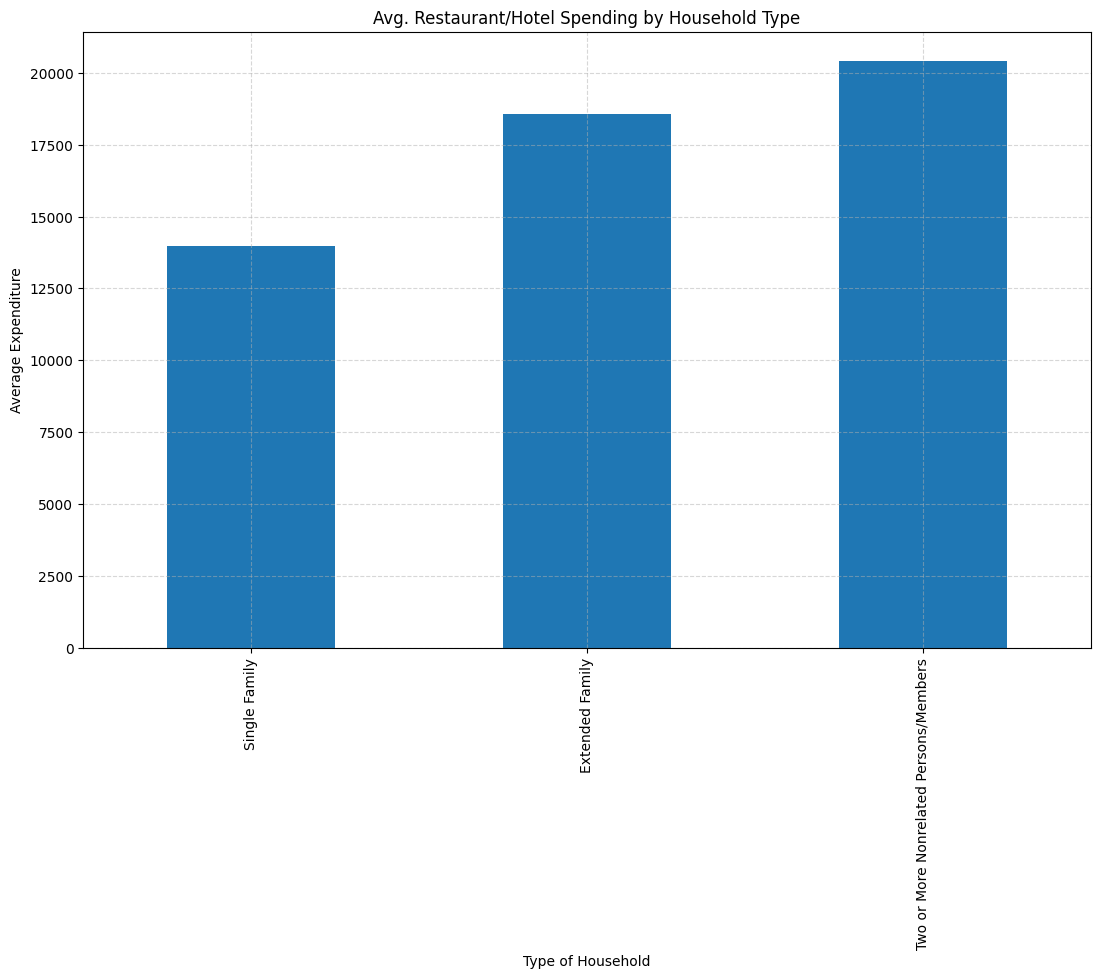

In [25]:
typerestaurant = df.groupby('Type of Household')['Restaurant and hotels Expenditure'].mean().sort_values()
typerestaurant.plot(kind='bar', title='Avg. Restaurant/Hotel Spending by Household Type')
plt.ylabel('Average Expenditure')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #19: Two or more nonrelated persons/members got the highest spending on restaurants/hotel, because I think they are usually don't cook in their households.</h1>

<h1 style="font-size:50px">20. Does having a job or business influence income levels?</h1>

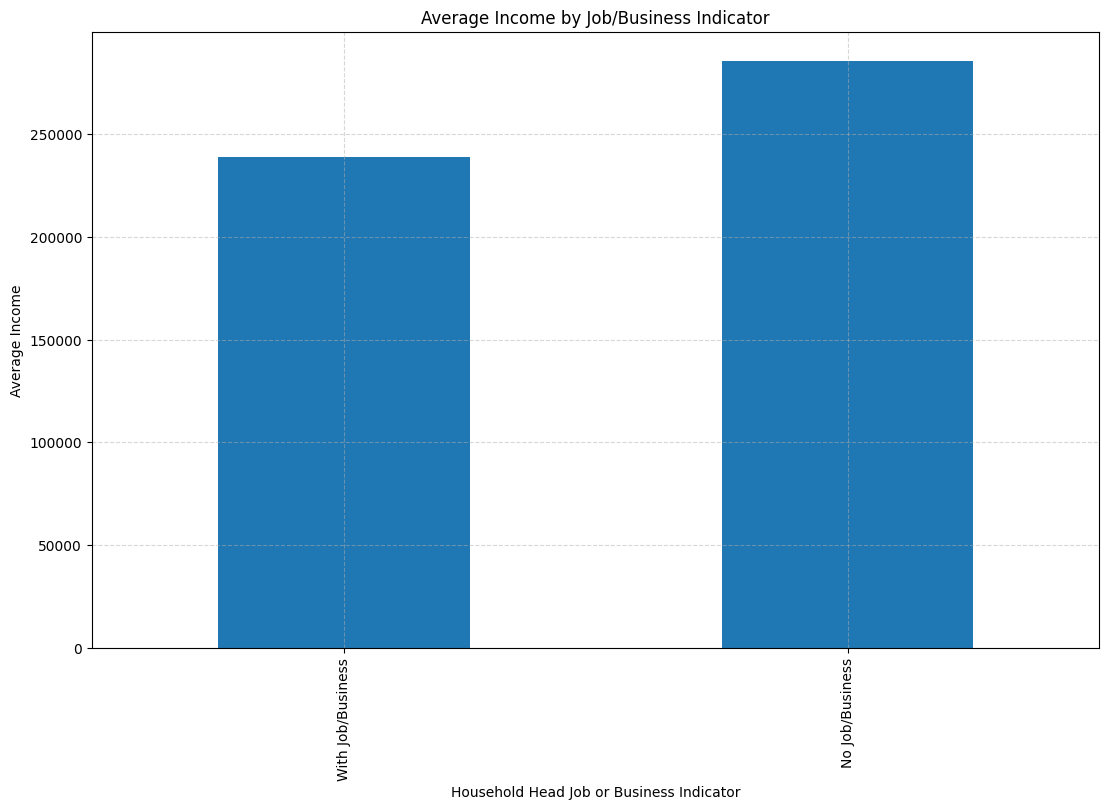

In [26]:
jobincome = df.groupby('Household Head Job or Business Indicator')['Total Household Income'].mean().sort_values()
jobincome.plot(kind='bar', title='Average Income by Job/Business Indicator')
plt.ylabel('Average Income')
plt.gcf().set_size_inches(13,8)
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

<h1>Insight #20: This shows that households where the head does not have a job/business actually have a higher average income than those who are with job/business.</h1>

In [27]:
df['Household Head Job or Business Indicator'].value_counts()

Household Head Job or Business Indicator
With Job/Business    34008
No Job/Business       7536
Name: count, dtype: int64

In [28]:
NoJobBusiness = df[df['Household Head Job or Business Indicator'] == 'No Job/Business']
NoJobBusiness['Main Source of Income'].value_counts()

Main Source of Income
Other sources of Income       4237
Wage/Salaries                 2639
Enterpreneurial Activities     660
Name: count, dtype: int64